# 处理文本（基础）

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

`matplotlib` 对文本的支持十分完善，包括数学公式，`Unicode` 文字，栅格和向量化输出，文字换行，文字旋转等一系列操作。

## 基础文本函数

在 `matplotlib.pyplot` 中，基础的文本函数如下：

- `text()` 在 `Axes` 对象的任意位置添加文本
- `xlabel()` 添加 x 轴标题
- `ylabel()` 添加 y 轴标题
- `title()` 给 `Axes` 对象添加标题
- `figtext()` 在 `Figure` 对象的任意位置添加文本
- `suptitle()` 给 `Figure` 对象添加标题
- `anotate()` 给 `Axes` 对象添加注释（可选择是否添加箭头标记）

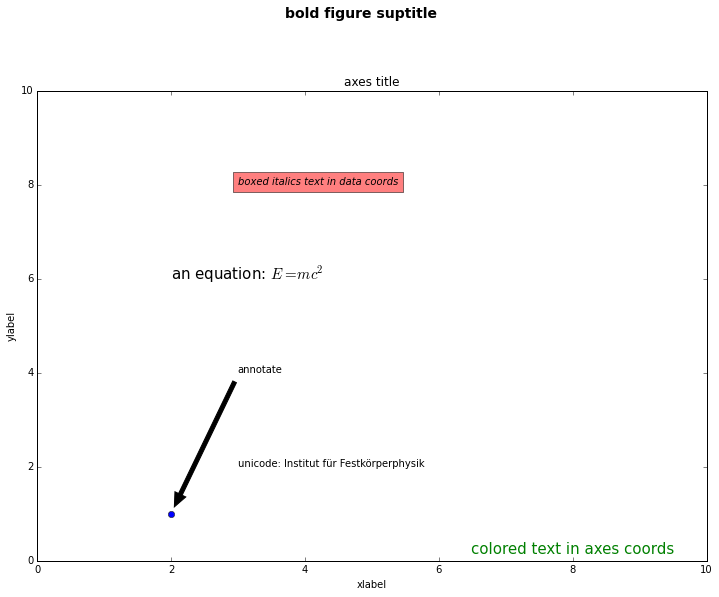

In [2]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure() 返回一个 Figure() 对象
fig = plt.figure(figsize=(12, 9))

# 设置这个 Figure 对象的标题
# 事实上，如果我们直接调用 plt.suptitle() 函数，它会自动找到当前的 Figure 对象
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

# Axes 对象表示 Figure 对象中的子图
# 这里只有一幅图像，所以使用 add_subplot(111)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

# 可以直接使用 set_xxx 的方法来设置标题
ax.set_title('axes title')
# 也可以直接调用 title()，因为会自动定位到当前的 Axes 对象
# plt.title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 添加文本，斜体加文本框
ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

# 数学公式，用 $$ 输入 Tex 公式
ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

# Unicode 支持
ax.text(3, 2, unicode('unicode: Institut f\374r Festk\366rperphysik', 'latin-1'))

# 颜色，对齐方式
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

# 注释文本和箭头
ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

# 设置显示范围
ax.axis([0, 10, 0, 10])

plt.show()

## 文本属性和布局

我们可以通过下列关键词，在文本函数中设置文本的属性：

关键词|值
---|---
alpha		|	    float
backgroundcolor		|    any matplotlib color
bbox		|	    rectangle prop dict plus key ``'pad'`` which is a pad in points
clip_box	|	    a matplotlib.transform.Bbox instance
clip_on		|	    [True ， False]
clip_path	|	    a Path instance and a Transform instance, a Patch
color	|		    any matplotlib color
family	|		    [ ``'serif'`` , ``'sans-serif'`` , ``'cursive'`` , ``'fantasy'`` , ``'monospace'`` ]
fontproperties		|    a matplotlib.font_manager.FontProperties instance
horizontalalignment or ha  | [ ``'center'`` , ``'right'`` , ``'left'`` ]
label			  |  any string
linespacing		  |  float
multialignment		 |   [``'left'`` , ``'right'`` , ``'center'`` ]
name or fontname	 |   string e.g., [``'Sans'`` , ``'Courier'`` , ``'Helvetica'`` ...]
picker		|	    [None,float,boolean,callable]
position	|	    (x,y)
rotation	|	    [ angle in degrees ``'vertical'`` , ``'horizontal'``
size or fontsize	 |   [ size in points , relative size, e.g., ``'smaller'``, ``'x-large'`` ]
style or fontstyle	|    [ ``'normal'`` , ``'italic'`` , ``'oblique'``]
text		|	    string or anything printable with '%s' conversion
transform	|	    a matplotlib.transform transformation instance
variant		|	    [ ``'normal'`` , ``'small-caps'`` ]
verticalalignment or va	  |  [ ``'center'`` , ``'top'`` , ``'bottom'`` , ``'baseline'`` ]
visible		|	    [True , False]
weight or fontweight	|    [ ``'normal'`` , ``'bold'`` , ``'heavy'`` , ``'light'`` , ``'ultrabold'`` , ``'ultralight'``]
x		|	    float
y		|	    float
zorder	|		    any number

其中 `va`, `ha`, `multialignment` 可以用来控制布局。
- `horizontalalignment` or `ha` ：x 位置参数表示的位置 
- `verticalalignment` or `va`：y 位置参数表示的位置
- `multialignment`：多行位置控制

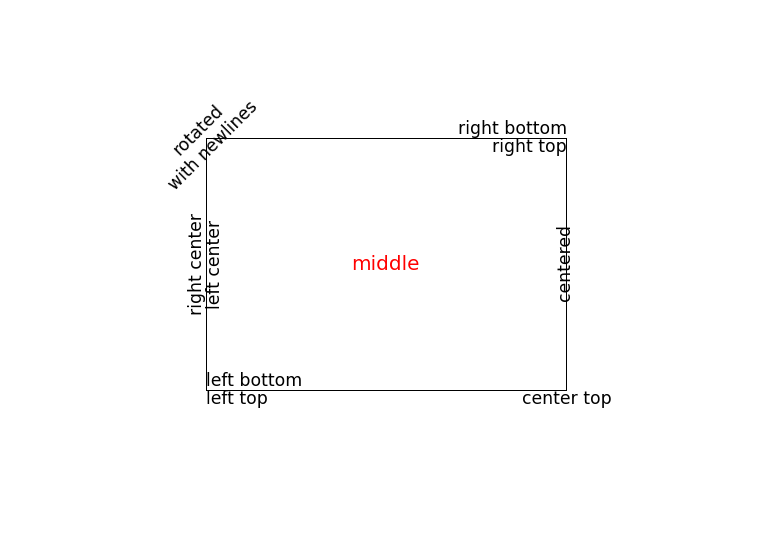

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

ax.text(left, bottom, 'left top',
        horizontalalignment='left',
        verticalalignment='top',
        transform=ax.transAxes,
        size='xx-large')

ax.text(left, bottom, 'left bottom',
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes,
        size='xx-large')

ax.text(right, top, 'right bottom',
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes,
        size='xx-large')

ax.text(right, top, 'right top',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
        size='xx-large')

ax.text(right, bottom, 'center top',
        horizontalalignment='center',
        verticalalignment='top',
        transform=ax.transAxes,
        size='xx-large')

ax.text(left, 0.5*(bottom+top), 'right center',
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes,
        size='xx-large')

ax.text(left, 0.5*(bottom+top), 'left center',
        horizontalalignment='left',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes,
        size='xx-large')

ax.text(0.5*(left+right), 0.5*(bottom+top), 'middle',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20, color='red',
        transform=ax.transAxes)

ax.text(right, 0.5*(bottom+top), 'centered',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        transform=ax.transAxes,
        size='xx-large')

ax.text(left, top, 'rotated\nwith newlines',
        horizontalalignment='center',
        verticalalignment='center',
        rotation=45,
        transform=ax.transAxes,
        size='xx-large')

ax.set_axis_off()
plt.show()

## 注释文本

`text()` 函数在 Axes 对象的指定位置添加文本，而 `annotate()` 则是对某一点添加注释文本，需要考虑两个位置：一是注释点的坐标 `xy` ，二是注释文本的位置坐标 `xytext`：

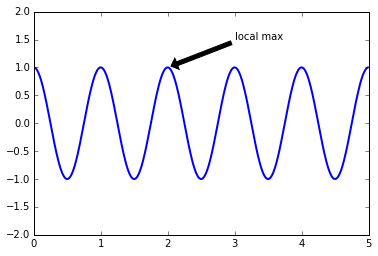

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.set_ylim(-2,2)
plt.show()

在上面的例子中，两个左边使用的都是原始数据的坐标系，不过我们还可以通过 `xycoords` 和 `textcoords` 来设置坐标系（默认是 `'data'`）：

参数|坐标系
--|--
‘figure points’|	points from the lower left corner of the figure
‘figure pixels’|	pixels from the lower left corner of the figure
‘figure fraction’|	0,0 is lower left of figure and 1,1 is upper right
‘axes points’|	points from lower left corner of axes
‘axes pixels’|	pixels from lower left corner of axes
‘axes fraction’|	0,0 is lower left of axes and 1,1 is upper right
‘data’|	use the axes data coordinate system

使用一个不同的坐标系：

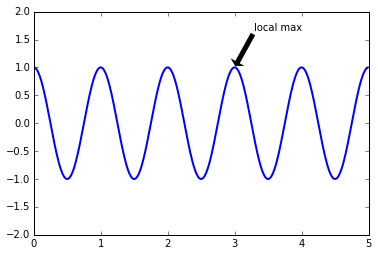

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(3, 1),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

ax.set_ylim(-2,2)
plt.show()

## 极坐标系注释文本

产生极坐标系需要在 `subplot` 的参数中设置 `polar=True`：

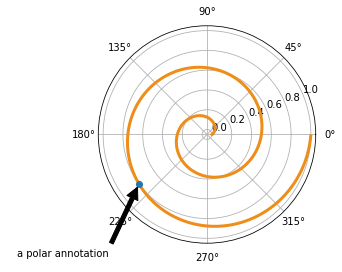

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()